In [29]:
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import seaborn as sns

import graphviz
import pydotplus
import io
from scipy import misc

%matplotlib inline

# Spotify EDA Classifier

In [41]:
data = pd.read_csv("db/spotify_output2.csv")
data.head()

,RowID,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,D,0.1650,-8.795,1,0.4310,150.062,4,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,C#,0.1370,-10.401,1,0.0794,160.083,4,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,D,0.1590,-7.148,1,0.2890,75.044,4,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,F,0.0922,-15.236,1,0.0261,86.468,4,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,F,0.4390,-11.648,0,0.0694,174.004,4,0.904,1,Parallel Lines,Junior Boys


In [42]:
len(data)

2017

In [32]:
type(data)

pandas.core.frame.DataFrame

In [33]:
data.describe()

,row,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,5341.000000,5341.000000,5341.000000,5.341000e+03,5341.000000,5341.000000,5341.000000,5341.000000,5341.000000,5341.000000,5341.000000,5341.000000,3004.000000,5341.000000
mean,2670.000000,0.182530,0.640573,2.361709e+05,0.676185,0.064339,5.301254,0.183376,-6.843199,0.625164,0.097398,120.706828,3.975366,0.535453
std,1541.958225,0.234755,0.153866,6.709983e+04,0.190395,0.195598,3.644612,0.147197,3.214023,0.484126,0.094509,27.101082,0.254285,0.239796
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.014500,-33.097000,0.000000,0.022400,47.859000,0.000000,0.032900
25%,1335.000000,0.017000,0.542000,1.989470e+05,0.559000,0.000000,2.000000,0.090700,-8.273000,0.000000,0.037600,99.797000,4.000000,0.346000
50%,2670.000000,0.078100,0.652000,2.248400e+05,0.701000,0.000005,5.000000,0.124000,-6.164000,1.000000,0.055300,120.057000,4.000000,0.542000
75%,4005.000000,0.255000,0.750000,2.581880e+05,0.823000,0.001460,9.000000,0.235000,-4.722000,1.000000,0.115000,136.518000,4.000000,0.731000
max,5340.000000,0.995000,0.984000,1.233667e+06,0.998000,0.976000,11.000000,0.977000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5341 entries, 0 to 5340
Data columns (total 17 columns):
row                 5341 non-null float64
track               5341 non-null object
acousticness        5341 non-null float64
danceability        5341 non-null float64
duration_ms         5341 non-null int64
energy              5341 non-null float64
id                  3332 non-null object
instrumentalness    5341 non-null float64
key                 5341 non-null float64
liveness            5341 non-null float64
loudness            5341 non-null float64
mode                5341 non-null float64
speechiness         5341 non-null float64
tempo               5341 non-null float64
time_signature      3004 non-null float64
track_href          3193 non-null object
valence             5341 non-null float64
dtypes: float64(13), int64(1), object(3)
memory usage: 709.4+ KB


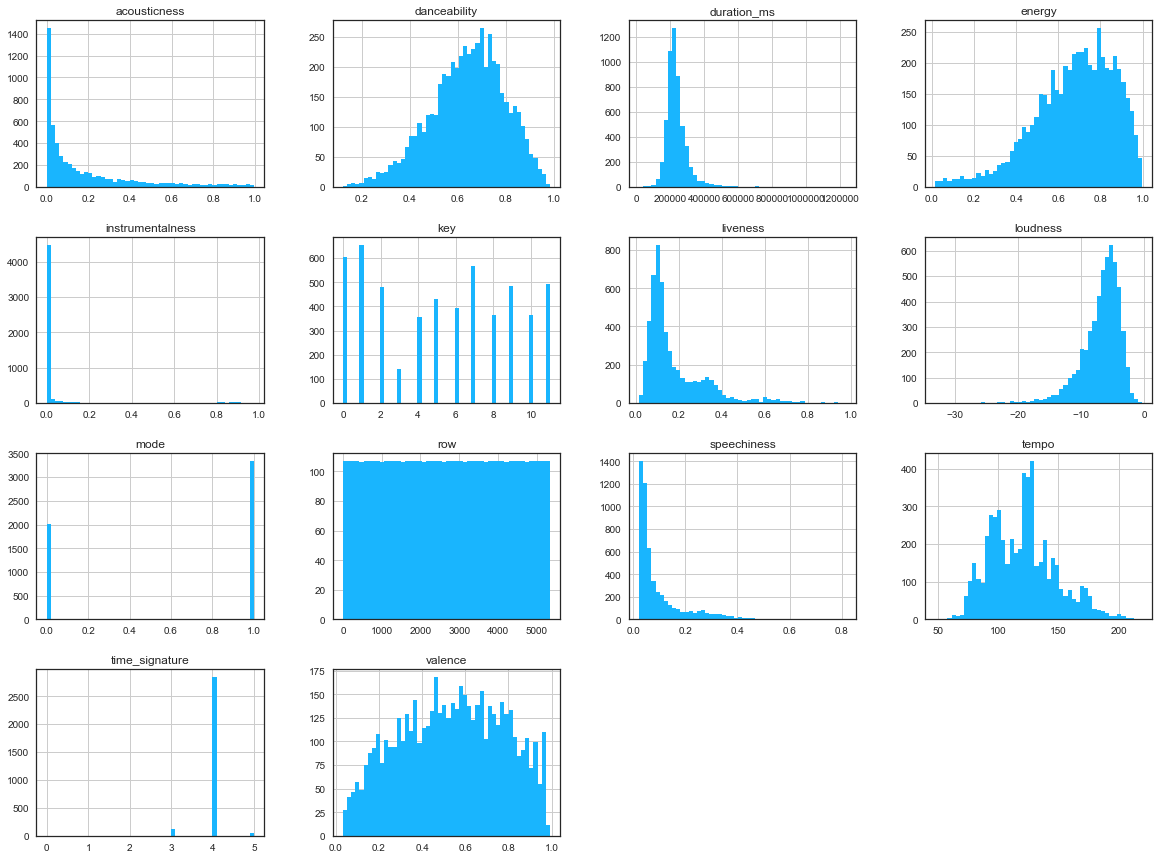

In [35]:
_ = data.hist(bins=50, figsize=(20,15))

In [36]:
train, test = train_test_split(data, test_size = 0.35)

In [37]:
print("Training size: {}; Test size: {}".format(len(train), len(test)))

Training size: 3471; Test size: 1870


In [38]:
red_blue = ["#19B5FE", "#EF4836"]
palette = sns.color_palette(red_blue)
sns.set_palette(palette)
sns.set_style("white")

/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:800: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


In [27]:
train.shape

(3471, 17)

In [14]:
pos_tempo = data[data['target'] == 1]['tempo']
neg_tempo = data[data['target'] == 0]['tempo']

pos_dance = data[data['target'] == 1]['danceability']
neg_dance = data[data['target'] == 0]['danceability']

pos_duration = data[data['target'] == 1]['duration_ms']
neg_duration = data[data['target'] == 0]['duration_ms']

pos_loudness = data[data['target'] == 1]['loudness']
neg_loudness = data[data['target'] == 0]['loudness']

pos_speechiness = data[data['target'] == 1]['speechiness']
neg_speechiness = data[data['target'] == 0]['speechiness']

pos_valence = data[data['target'] == 1]['valence']
neg_valence = data[data['target'] == 0]['valence']

pos_energy = data[data['target'] == 1]['energy']
neg_energy = data[data['target'] == 0]['energy']

pos_acousticness = data[data['target'] == 1]['acousticness']
neg_acousticness = data[data['target'] == 0]['acousticness']

pos_key = data[data['target'] == 1]['key']
neg_key = data[data['target'] == 0]['key']

pos_instrumentalness = data[data['target'] == 1]['instrumentalness']
neg_instrumentalness = data[data['target'] == 0]['instrumentalness']

KeyError: 'target'

NameError: name 'pos_tempo' is not defined

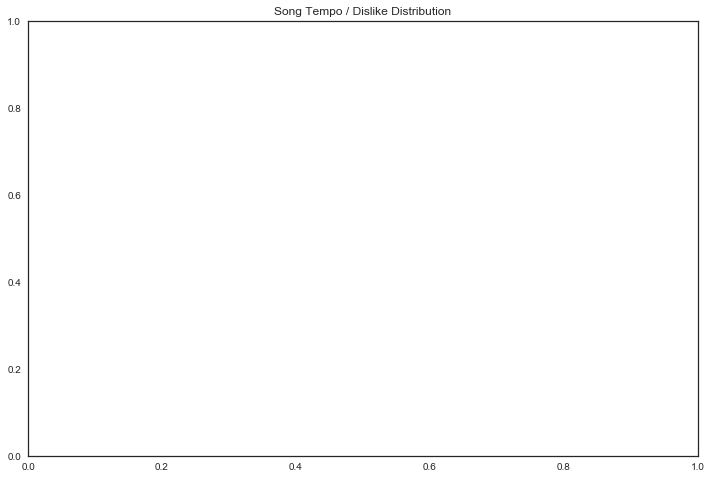

In [39]:
fig = plt.figure(figsize=(12, 8))
plt.title("Song Tempo / Dislike Distribution")
pos_tempo.hist(alpha=0.5, bins = 30, label='positive')
neg_tempo.hist(alpha=0.5, bins = 30, label='negative')
ax1 = set_xlabel = 'Tempo'
ax2 = set_ylabel = 'Count'
plt.legend(loc = 'upper right')

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


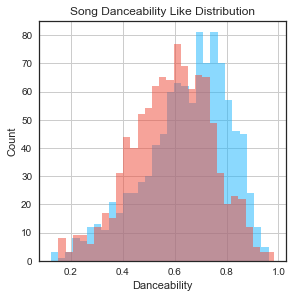

In [327]:
fig2 = plt.figure(figsize=(15, 15))

# Danceability
ax3 = fig2.add_subplot(331)
ax3.set_xlabel('Danceability')
ax3.set_ylabel('Count')
ax3.set_title("Song Danceability Like Distribution")
pos_dance.hist(alpha = 0.5, bins=30)
ax4 = fig2.add_subplot(331)
neg_dance.hist(alpha = 0.5, bins=30)

In [328]:
c = DecisionTreeClassifier(min_samples_split=150)

In [329]:
features = ['danceability', 'loudness', 'valence', 'energy', 
            'instrumentalness', 'acousticness', 
            #'key', 
            'speechiness', 'duration_ms', 'speechiness']

In [330]:
X_train = train[features]
y_train = train["target"]

X_test = test[features]
y_test = test["target"]

In [331]:
dt = c.fit(X_train, y_train)

In [332]:
def show_tree(tree, features, path):
    f = io.StringIO()
    export_graphviz(tree, out_file=f, feature_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = misc.imread(path)
    plt.rcParams['figure.figsize'] = (20, 20)
    plt.imshow(img)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """


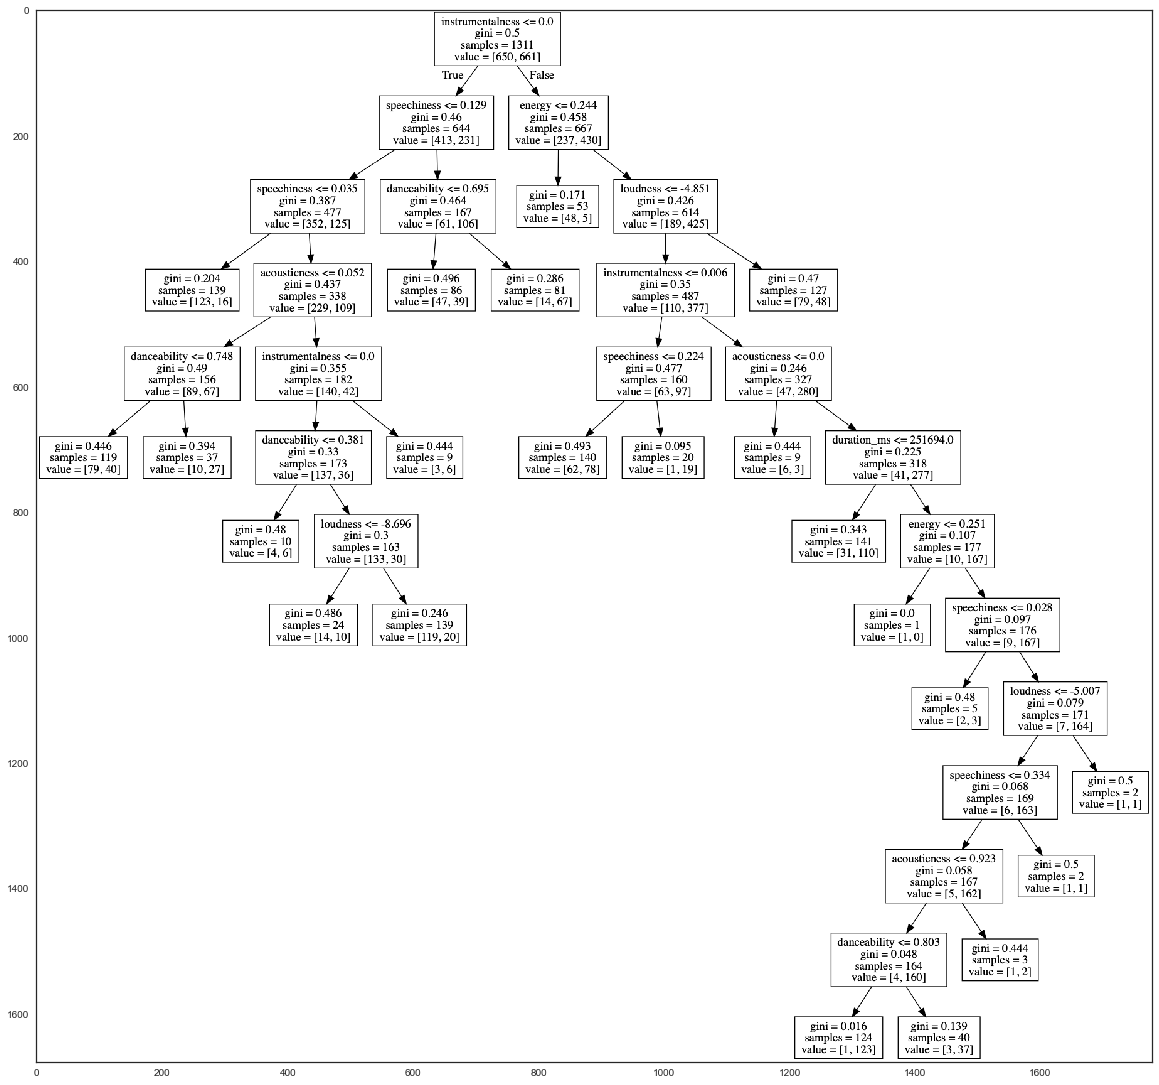

In [333]:
show_tree(dt, features, 'dec_tree_01.png')

In [334]:
y_pred = c.predict(X_test)

In [335]:
y_pred

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,

In [336]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, y_pred) * 100

In [337]:
print("Accuracy using Decision Tree:", round(score, 1), "%")

Accuracy using Decision Tree: 69.7 %


In [338]:
#exporting model
import pickle
pickle.dump(dt,open("models/decision_tree_model.pkl","wb"))

# Model 2 

In [339]:
train, test = train_test_split(data, test_size = 0.35)

In [340]:
print("Training size: {}; Test size: {}".format(len(train), len(test)))

Training size: 1311; Test size: 706


In [341]:
train.shape

(1311, 17)

In [342]:
c = DecisionTreeClassifier(min_samples_split=50)

In [343]:
features = ['danceability', 'tempo', 'energy', 'liveness', 'loudness', 'speechiness', 'tempo']

In [344]:
X_train = train[features]
y_train = train['target']

X_test = test[features]
y_test = test['target']

In [345]:
dt = c.fit(X_train, y_train)

In [346]:
def show_tree(tree, features, path):
    f = io.StringIO()
    export_graphviz(tree, out_file=f, feature_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = misc.imread(path)
    plt.rcParams['figure.figsize'] = (20, 20)
    plt.imshow(img)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """


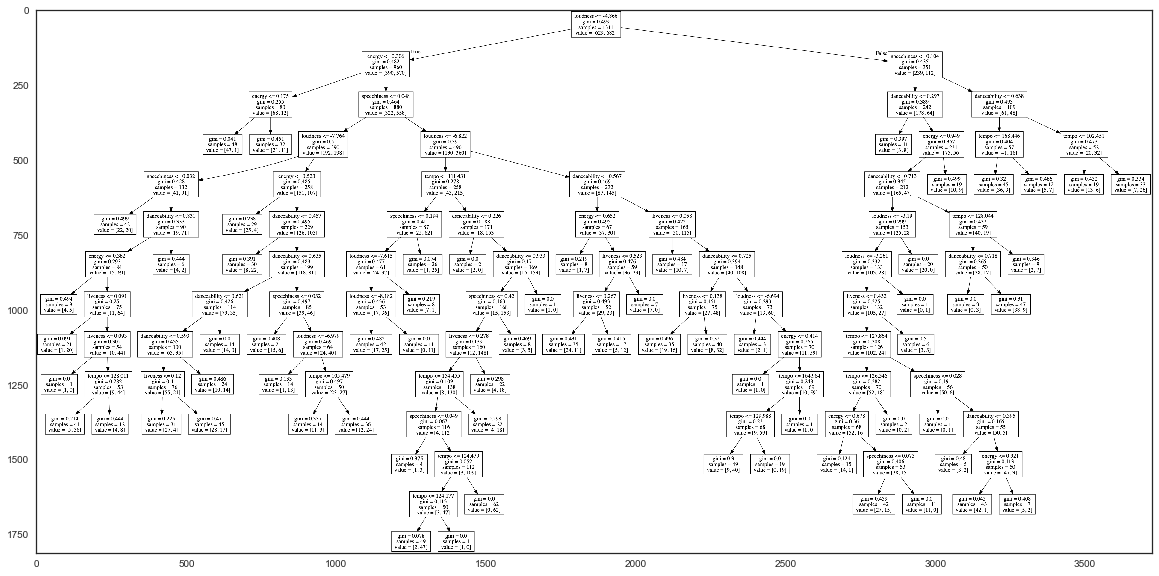

In [347]:
show_tree(dt, features, 'dec_tree_02.png')

In [348]:
y_pred = c.predict(X_test)

In [349]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [350]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, y_pred) * 100

In [351]:
print("Accuracy using Decision Tree:", round(score, 1), "%")

Accuracy using Decision Tree: 66.1 %


# Deep Learning

In [283]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

In [284]:
# Transform the training and testing data using the X_scaler

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [285]:
from keras.utils import to_categorical

# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [286]:
# first, create a normal neural network with 2 inputs, 6 hidden nodes, and 2 outputs
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=7, activation='relu', input_dim=2))
#model.add(Dense(units=7, activation='softmax'))

In [287]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 7)                 21        
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [288]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [289]:
# Fit the model to the training data
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

ValueError: Error when checking input: expected dense_12_input to have shape (2,) but got array with shape (7,)

# KNN

In [ ]:
target = data['target']